In [ ]:
# Classify the email using the binary classification method.
# Email Spam detection has two states:
# a) Normal State – Not Spam
# b) Abnormal State – Spam
# Use K-Nearest Neighbors and Support Vector Machine for classification.
# Analyze their performance.
# Dataset link: The emails.csv dataset on Kaggle
# https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/DSBDAL/emails.csv'
df=pd.read_csv(path)

In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df=df.drop(['Email No.'],axis=1)
#Remove the Email No. column since it is likely an identifier and not useful for the classification task

In [ ]:
#Define the features (X) and target variable (y).
#X: All columns except the Prediction column, which are the features.
#y: The Prediction column, which contains labels (0 for Not Spam, 1 for Spam).

X=df.drop(['Prediction'],axis=1)
y=df['Prediction']

In [ ]:
from sklearn.preprocessing import scale
X=scale(X)
#X = scale(X) standardizes the features in X, giving them a mean of 0 and a standard deviation of 1, which helps improve the performance of many machine learning algorithms.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#test_size=0.3 sets aside 30% of the data for testing.
#random_state=42 ensures the split is reproducible, so the results will be the same every time you run this code.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)
#trains the KNN model on the training data

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict(X_test)
#uses the trained model to predict the labels (Spam or Not Spam) for the test set,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#enerates a report showing precision, recall, F1-score, and support for each class.

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1097
           1       0.68      0.94      0.79       455

    accuracy                           0.85      1552
   macro avg       0.82      0.88      0.84      1552
weighted avg       0.88      0.85      0.86      1552



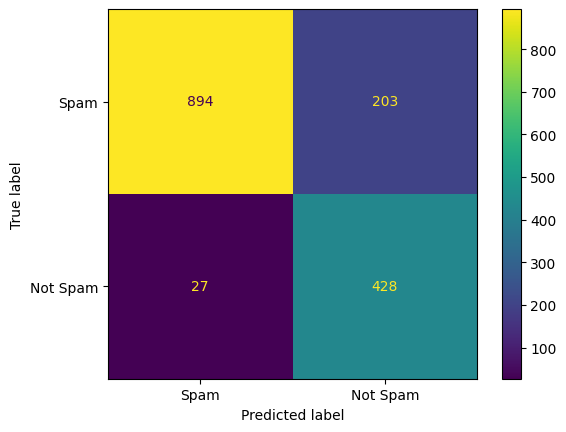

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cnf=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['Spam','Not Spam'])

cm.plot()
plt.show()

#The confusion matrix is a powerful tool for evaluating the performance of a classification model.

In [ ]:

#read precison ,recall formula and def

# tp  fp
# fn    tn

In [ ]:
###Support Vector Machine Classification
from sklearn.svm import SVC
#higher C tries to avoid misclassification
#The parameter
#C controls how much the model prioritizes correctly classifying training emails versus maintaining a simple decision boundary.
model=SVC(C=4)

model.fit(X_train,y_train);
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1097
           1       0.96      0.90      0.93       455

    accuracy                           0.96      1552
   macro avg       0.96      0.94      0.95      1552
weighted avg       0.96      0.96      0.96      1552



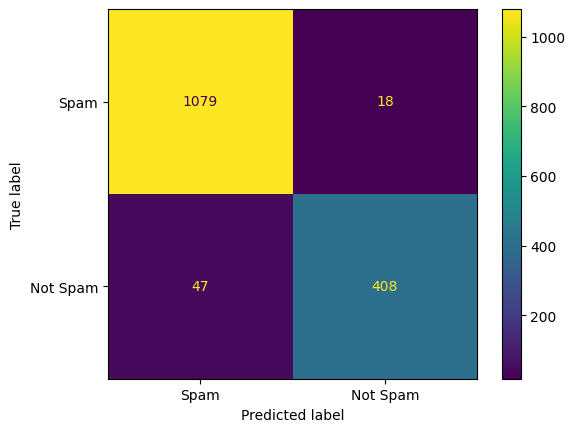

In [ ]:
cnf=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['Spam','Not Spam'])

cm.plot()
plt.show()